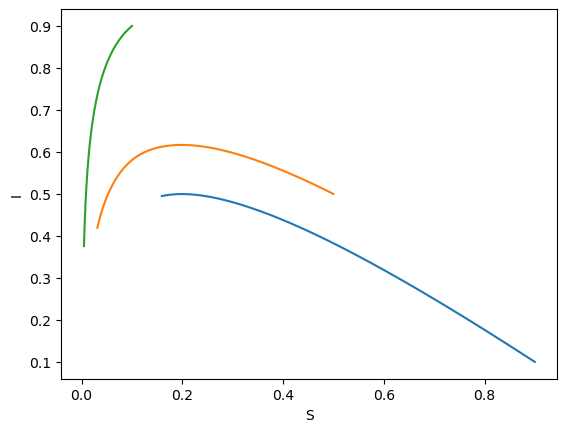

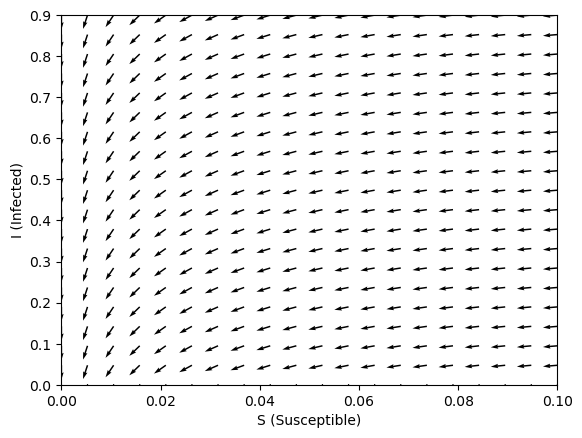

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

beta, gamma, S, I = sp.symbols('beta gamma S I')
dS_dt = -beta * S * I
dI_dt = beta * S * I - gamma * I
dR_dt = gamma * I

# Convert to a numerical function
f = sp.lambdify((S, I, beta, gamma), [dS_dt, dI_dt])

t_span = [0, 10]  # Time interval, i.e, from 0 to 10 days

beta_value = 0.5
gamma_value = 0.1
initial_conditions = np.array([[0.9, 0.1], [0.5, 0.5], [0.1, 0.9]])
t_eval = np.linspace(t_span[0], t_span[1], 300)

for S0, I0 in initial_conditions:
    sol = solve_ivp(lambda t, y: f(y[0], y[1], beta_value, gamma_value), t_span, [S0, I0], t_eval = t_eval)
    plt.plot(sol.y[0], sol.y[1])
plt.xlabel('S')
plt.ylabel('I')
plt.show()

def system(t, y):
    return f(y[0], y[1], beta_value, gamma_value)


S_max = max([max(sol.y[0]) for S0, I0 in initial_conditions])
I_max = max([max(sol.y[1]) for S0, I0 in initial_conditions])

x = np.linspace(0, S_max, 20)
y = np.linspace(0, I_max, 20)
X, Y = np.meshgrid(x, y)
U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        slopes = system(0, [X[i, j], Y[i, j]])
        U[i, j], V[i, j] = slopes


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        norm = np.sqrt(U[i, j]**2 + V[i, j]**2)
        if norm != 0:
            U[i, j], V[i, j] = U[i, j] / norm, V[i, j] / norm

plt.quiver(X, Y, U, V, angles='xy')
plt.xlim([0, S_max])
plt.ylim([0, I_max])
plt.xlabel('S (Susceptible)')
plt.ylabel('I (Infected)')
plt.show()

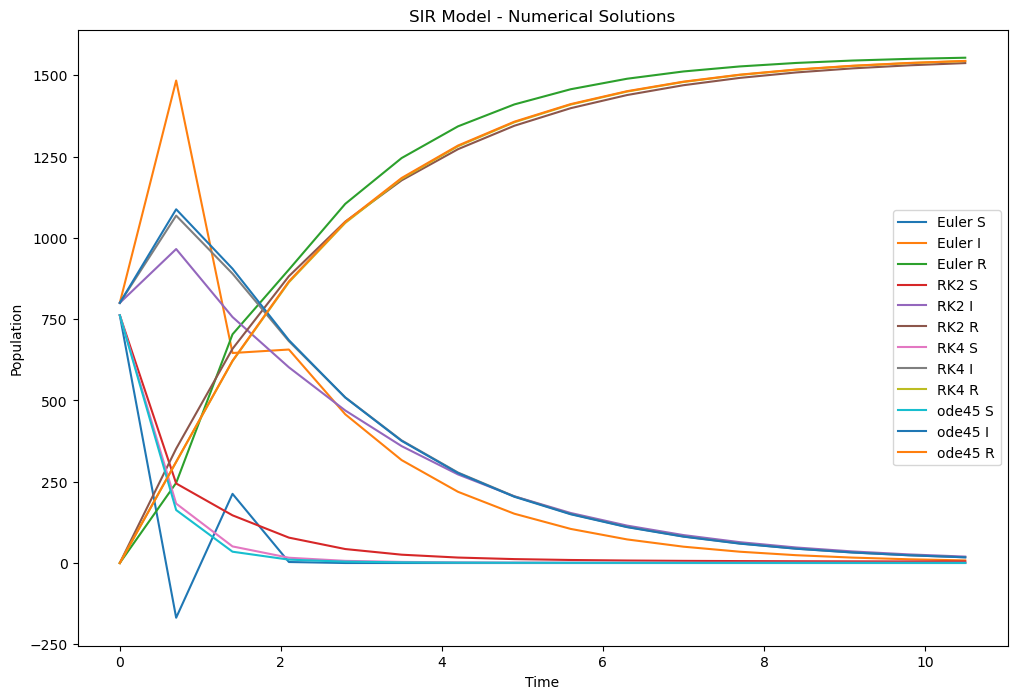

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
beta = 2.18e-3  # Transmission coefficient
gamma = 0.44    # Recovery rate
t_span = (0, 10.5)
step_size = 0.7
t_eval = np.arange(t_span[0], t_span[1] + step_size, step_size)
S0, I0, R0 = 762, 800, 0  # Initial conditions

# System of ODEs
def sir_model(t, y):
    S, I, R = y
    return [-beta * S * I, beta * S * I - gamma * I, gamma * I]

# Euler Method
def euler_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        y[:, i] = y[:, i-1] + step_size * np.array(func(t[i-1], y[:, i-1]))
    return y

# RK-2 Method
def rk2_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = step_size * np.array(func(t[i-1], y[:, i-1]))
        k2 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k1/2))
        y[:, i] = y[:, i-1] + k2
    return y

# RK-4 Method
def rk4_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = step_size * np.array(func(t[i-1], y[:, i-1]))
        k2 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k1/2))
        k3 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k2/2))
        k4 = step_size * np.array(func(t[i-1] + step_size, y[:, i-1] + k3))
        y[:, i] = y[:, i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Solve using Euler, RK2, RK4, and ode45
y_euler = euler_method(sir_model, t_eval, [S0, I0, R0])
y_rk2 = rk2_method(sir_model, t_eval, [S0, I0, R0])
y_rk4 = rk4_method(sir_model, t_eval, [S0, I0, R0])
sol_ode45 = solve_ivp(sir_model, t_span, [S0, I0, R0], method='RK45', t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t_eval, y_euler[0], label='Euler S')
plt.plot(t_eval, y_euler[1], label='Euler I')
plt.plot(t_eval, y_euler[2], label='Euler R')

plt.plot(t_eval, y_rk2[0], label='RK2 S')
plt.plot(t_eval, y_rk2[1], label='RK2 I')
plt.plot(t_eval, y_rk2[2], label='RK2 R')

plt.plot(t_eval, y_rk4[0], label='RK4 S')
plt.plot(t_eval, y_rk4[1], label='RK4 I')
plt.plot(t_eval, y_rk4[2], label='RK4 R')

plt.plot(sol_ode45.t, sol_ode45.y[0], label='ode45 S')
plt.plot(sol_ode45.t, sol_ode45.y[1], label='ode45 I')
plt.plot(sol_ode45.t, sol_ode45.y[2], label='ode45 R')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model - Numerical Solutions')
plt.legend()
plt.show()